# Joint Probability (Discrete)

In [1]:
# Import some helper functions (please ignore this!)
from utils import * 

**Context:** So far, you've spent some time conducting a preliminary exploratory data analysis (EDA) of IHH's ER data. You noticed that considering variables separately can result in misleading information. As a result, you decided to use *conditional distributions* to model the *relationship between variables*. Using these conditional distributions, you were able to develop *predictive models* (e.g. predicting the probability of intoxication given the day of the week), These predictive models are useful for the IHH administration to make decisions. 

However, you've noticed that your modeling toolkit is still limited. The conditional distributions we introduced can model how the probability of one variable changes given a *set* of variables. What if we wanted to describe how the probability of a *set* of variables (i.e. more than one) changes given a *set* of variables? For example, we may want to answer questions like: "how does the probability that a patient is hospitalized for an allergic reaction change given the day of the week?". In this question, we're asking a question about two variables---that the condition is an allergic reaction, *and* that the patient was hospitalized---given the day of the week.

**Challenge:** We need to expand our modeling toolkit to include yet another tool---joint probabilities. 

**Outline:**
1. Introduce and practice the concepts, terminology, and notation behind discrete joint probability distributions (leaving continuous distributions to a later time).
2. Introduce a graphical representation to describe joint distributions.
3. Translate this graphical representation directly into code in a probabilistic programming language (using `NumPyro`) that we can then use to fit the data.

Before getting started, let's load in our IHH ER data:

In [2]:
# Import a bunch of libraries we'll be using below
import pandas as pd
import matplotlib.pylab as plt
import numpyro
import numpyro.distributions as D
import jax
import jax.numpy as jnp

# Load the data into a pandas dataframe
csv_fname = 'IHH-ER.csv'
data = pd.read_csv(csv_fname, index_col='Patient ID')

# Print a random sample of 5 patients, just to see what's in the data
data.sample(15, random_state=0)

,Day-of-Week,Condition,Hospitalized,Antibiotics,Attempts-to-Disentangle
Patient ID,,,,,
9394,Friday,Allergic Reaction,No,No,NaN
898,Sunday,Allergic Reaction,Yes,Yes,NaN
2398,Saturday,Entangled Antennas,No,No,4.0
5906,Saturday,Allergic Reaction,No,No,NaN
2343,Monday,High Fever,Yes,No,NaN
8225,Thursday,High Fever,Yes,No,NaN
5506,Tuesday,High Fever,No,No,NaN
6451,Thursday,Allergic Reaction,No,No,NaN
2670,Sunday,Intoxication,No,No,NaN


## Terminology and Notation

We, again introduce the statistical language---terminology and notation---to precisely specify to a computer how to model our data. We will then translate statements in this language directly into code in `NumPyro` that a computer can run.

**Concept:** The concept behind a joint probability is elegant. It allows us to build complicated distributions over many variables using simple conditional and non-conditional distributions (that we already covered). 

We can illustrate this using an example with just two variables. Suppose you have two RVs, $A$ and $B$. The probability that $A = a$ and $B = b$ are *both* satisfied is called their *joint probability*. It is denoted by $p_{A,B}(a, b)$. This joint distribution can be *factorized* to a product of conditional and non-conditional (or "marginal") distributions as follows:
\begin{align*}
p_{A, B}(a, b) &= p_{A | B}(a | b) \cdot p_B(b) \quad \text{(Option \#1)} \\
&= p_{B | A}(b | a) \cdot p_A(a) \quad \text{(Option \#2)}
\end{align*}
Notice that the joint is now described in terms of conditional and marginal distributions, which we already know how to work with! 

**Intuition:** So what's the intuition behind this formula? If we look at Option \#1, $p_B(b)$ evaluates the probability that $B = b$ independently of $A = a$. By using $p_{A | B}(a | b)$, we make sure that we 

**Choice of Factorization:** Lastly, notice that we have a *choice* to factorize the distribution in two ways. How do you know which one to use? Typically, we choose a factorization that is *intuitive to us*. 

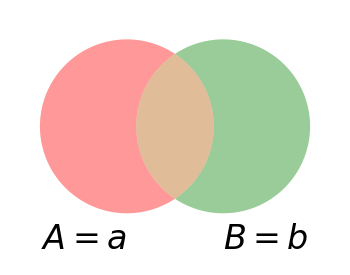

In [3]:
display_joint_probability_illustration()

## Graphical Representation

## Translating Math to Code with `NumPyro`